## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Import Data

In [3]:
# Define path 

path = '/Volumes/2020-2021/CareerFoundry/Data Analytics Program/Achievement 6 Immersion/6 Immersion Project'

In [4]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','Final_Spotify_database_cleaned.pkl'))

In [5]:
df

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,...,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,...,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38.0,False,Freedom,...,0,0,1,0,0,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,...,0,0,1,0,0,0,174,0.0,0.0,english speaking and nordic


In [6]:
#data cleaning
df.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)

In [7]:
df.head(20)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
5,Chile,https://open.spotify.com/track/6FyRXC8tJUh863J...,60264.20,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
6,Colombia,https://open.spotify.com/track/6FyRXC8tJUh863J...,60131.15,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,2,1.0,1.0,spanish speaking
7,Costa Rica,https://open.spotify.com/track/6FyRXC8tJUh863J...,64081.30,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
8,Germany,https://open.spotify.com/track/6FyRXC8tJUh863J...,208.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,180,0.0,0.0,english speaking and nordic
9,Ecuador,https://open.spotify.com/track/6FyRXC8tJUh863J...,75636.90,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking


In [8]:
df.shape

(170633, 151)

In [9]:
# Check for missing values

df.isnull().sum()

# no missing values

Country        0
Uri            0
Popularity     0
Title          0
Artist         0
              ..
USA            0
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
Length: 151, dtype: int64

### Look for Duplicates

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(170633,)

### Look for extreme values

/Users/Nicole/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Popularity', ylabel='Density'>

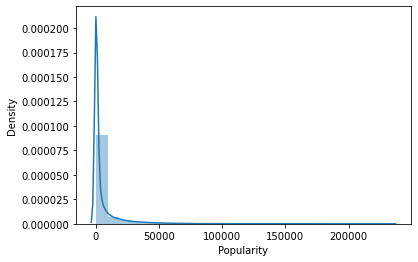

In [22]:
sns.distplot(df['Popularity'], bins=25) 

In [13]:
df['Popularity'].mean() # Check the mean

5417.616264145941

In [14]:
df['Popularity'].mode() # Check the mean

0    0.8
dtype: float64

In [15]:
df['Popularity'].median() # Check the mean

515.1500000000002

In [16]:
df['Popularity'].max() # Check the mean

233766.89999999988

#### Hypothesis - The higher in popularity results in the top 50 in charts

## Data prep for regression analysis

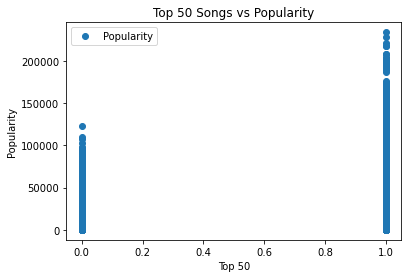

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Top50_dummy', y='Popularity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Top 50 Songs vs Popularity')  
plt.xlabel('Top 50')  
plt.ylabel('Popularity')  
plt.show()

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Top50_dummy'].values.reshape(-1,1)
y = df['Popularity'].values.reshape(-1,1)

In [47]:
X

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [48]:
y

array([[3.183395e+04],
       [8.000000e+00],
       [7.692440e+04],
       ...,
       [9.040000e+01],
       [2.160000e+01],
       [4.640000e+01]])

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [50]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

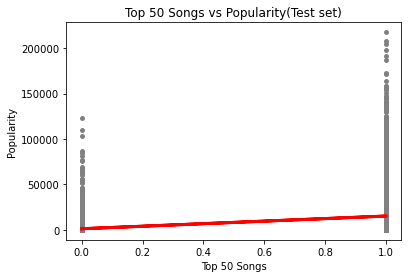

In [53]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Top 50 Songs vs Popularity(Test set)')
plot_test.xlabel('Top 50 Songs')
plot_test.ylabel('Popularity')
plot_test.show()

In [54]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[14002.90782542]]
Mean squared error:  131193606.87340988
R2 score:  0.2390895952822829


In [56]:
y_predicted

array([[ 1283.25341733],
       [15286.16124275],
       [15286.16124275],
       ...,
       [ 1283.25341733],
       [ 1283.25341733],
       [ 1283.25341733]])

In [57]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,76.80,1283.253417
1,49838.15,15286.161243
2,4844.20,15286.161243
3,735.20,1283.253417
4,24.80,1283.253417
5,732.05,15286.161243
6,3210.75,15286.161243
7,22205.25,15286.161243
8,46743.50,15286.161243
9,15.20,1283.253417


In [58]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[14002.90782542]]
Mean squared error:  131103108.22706719
R2 score:  0.23713577127356478


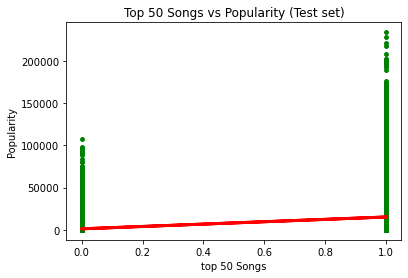

In [63]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Top 50 Songs vs Popularity (Test set)')
plot_test.xlabel('top 50 Songs')
plot_test.ylabel('Popularity')
plot_test.show()

While there is a positive relationship, it'safe to say that a regression may not be the best model to represent this data and can’t accurately predict the Top 50 songs to a chart to the popularity due to the large size of the MSE. Also the R2 score is closer to 0 than it is to 1 which indicates a poor fit for this model. 

The popularity was determined by people looking to overcome the bias in the Spotify popularity rankings, so this could be a bias itself. 